In [1]:
# import webdriver
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import numpy as np
# define path of the webdriver
PATH = "C:\Program Files (x86)\chromedriver.exe"
options = webdriver.ChromeOptions()
options.add_argument("--lang=en")
options.add_argument("--start-maximized")
options. add_argument("--auto-open-devtools-for-tabs")
# create a driver instance by passing the driver path
driver = webdriver.Chrome(PATH, options=options)

C:\Users\OSCARW~1\AppData\Local\Temp/ipykernel_5184/1950913125.py:14: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH, options=options)


In [2]:
driver.get('https://www.hotels.com/Hotel-Search?adults=2&d1=2022-07-31&d2=2022-08-01&destination=Hong%20Kong%2C%20Hong%20Kong%20Island%2C%20Hong%20Kong%20SAR&endDate=2022-08-01&latLong=22.28333%2C114.15875&regionId=184245&selected=&semdtl=&sort=RECOMMENDED&startDate=2022-07-31&theme=&useRewards=false&userIntent=')

In [3]:
step_last_pos = 0
while True:
    while True:
        time.sleep(3)
        last_pos = driver.execute_script("return window.pageYOffset")
        driver.execute_script(f"window.scrollTo(0, document.body.scrollHeight)")
        current_pos = driver.execute_script("return window.pageYOffset")
        if last_pos == current_pos:
            print('done scrolling')
            break
    time.sleep(3)
    step_last_pos = driver.execute_script("return document.body.scrollHeight")
    print(step_last_pos)
    button = driver.find_element(By.XPATH, '//*[@id="app-layer-base"]/div/main/div/div/div/div[1]/section/div/div[2]/div[2]/section[3]/button')
    button.click()
    print('clicked show more')
    time.sleep(5)
    step_current_pos = driver.execute_script("return document.body.scrollHeight")
    print(step_current_pos)
    if step_last_pos == step_current_pos:
        print('done all')
        break

done scrolling
10942
clicked show more
19612
done scrolling
19612
clicked show more
27817
done scrolling
27817
clicked show more
36419
done scrolling
36419
clicked show more
45187
done scrolling
45187
clicked show more
53507
done scrolling
53507
clicked show more
60915
done scrolling
60915
clicked show more
68363
done scrolling
68363
clicked show more
75898
done scrolling
75898
clicked show more
83248
done scrolling
83248
clicked show more
85540
done scrolling
85540
clicked show more
85540
done all


//*[@id="app-layer-base"]/div/main/div/div/div/div[1]/section/div/div[2]/div[2]/section[3]/button
//*[@id="app-layer-base"]/div/main/div/div/div/div[1]/section/div/div[2]/div[2]/section[3]/button
//*[@id="app-layer-base"]/div/main/div/div/div/div[1]/section/div/div[2]/div[2]/section[3]/button
//*[@id="app-layer-base"]/div/main/div/div/div/div[1]/section/div/div[2]/div[2]/section[3]/button

In [4]:
time.sleep(5)
table = driver.find_element(By.CLASS_NAME, 'results-list')
items = table.find_elements(By.TAG_NAME, 'li')
print(items[0].text)

JW Marriott Hotel Hong Kong
Photo gallery for JW Marriott Hotel Hong Kong
Exterior
Ad
JW Marriott Hotel Hong Kong
Admiralty
Fully refundable
Reserve now, pay later
Collect stamps
9.0/10Wonderful(1,000 reviews)
9.0 out of 10 Wonderful (1,000 reviews)
The price is HK$2,280
HK$2,280
HK$2,508 total
Opens JW Marriott Hotel Hong Kong in new tab, return to original tab to proceed


In [5]:
time.sleep(5)
hotel_names = []
hotel_locs = []
hotel_prices = []
hotel_ratings = []
for item in items:
    try:
        hotel_name = item.find_element(By.TAG_NAME, 'h3')
        hotel_loc = item.find_element(By.CLASS_NAME, 'uitk-text')
        hotel_price = item.find_element(By.XPATH, './div/div/div[2]/div/div[2]/div[2]/div/div[1]/div/span/div')
        hotel_rating = item.find_element(By.XPATH, './div/div/div[2]/div/div[2]/div[1]/div/div[2]/span[1]/span')
        hotel_names.append(hotel_name.text)
        hotel_locs.append(hotel_loc.text)
        hotel_prices.append(hotel_price.text)
        hotel_ratings.append(hotel_rating.text)
    except:
        continue

In [6]:
print(hotel_locs)
print(hotel_names)
print(hotel_prices)
print(hotel_ratings)
print(len(hotel_locs))
print(len(hotel_names))
print(len(hotel_prices))
print(len(hotel_ratings))

['Admiralty', 'Wan Chai', 'Sheung Wan', 'Causeway Bay', 'Central & Western District', 'Wan Chai', 'Central & Western District', 'Admiralty', 'Sheung Wan', 'North Point', 'Sheung Wan', 'Sheung Wan', 'Wan Chai', 'North Point', 'Wan Chai', 'Central & Western District', 'Wan Chai', 'Wan Chai', 'Admiralty', 'Causeway Bay', 'Sai Ying Pun', 'Wan Chai', 'Admiralty', 'North Point', 'North Point', 'Sheung Wan', 'Central & Western District', 'Causeway Bay', 'Causeway Bay', 'Wan Chai', 'Southern District', 'Sheung Wan', 'Central & Western District', 'Sheung Wan', 'Central & Western District', 'Wan Chai', 'Hong Kong', 'Sheung Wan', 'Causeway Bay', 'Central & Western District', 'Causeway Bay', 'Mid-Levels', 'Sheung Wan', 'Wan Chai', 'Wan Chai', 'Causeway Bay', 'Causeway Bay', 'Sai Ying Pun', 'Hong Kong', 'Wan Chai', 'Sheung Wan', 'Central & Western District', 'North Point', 'Tin Hau', 'Wan Chai', 'Wan Chai', 'Sheung Wan', 'Sheung Wan', 'Wan Chai', 'Sheung Wan', 'Sheung Wan', 'Hong Kong', 'Sai Ying P

In [7]:
import pandas as pd
df = pd.DataFrame({'Hotel Name': hotel_names, 'Price Per Night': hotel_prices, 'Location': hotel_locs, 'Average Rating': hotel_ratings})
df['Price Per Night'] = df['Price Per Night'].str.split('$', expand=True)[1]
df['Price Per Night'] = df['Price Per Night'].str.replace(',', '')
df['Average Rating'] = df['Average Rating'].str.split('/', expand=True)[0]
df.head()

,Hotel Name,Price Per Night,Location,Average Rating
0,JW Marriott Hotel Hong Kong,2280,Admiralty,9.0
1,The Hari Hong Kong,1063,Wan Chai,9.0
2,iclub Sheung Wan Hotel,448,Sheung Wan,8.2
3,"The Park Lane Hong Kong, a Pullman Hotel",1062,Causeway Bay,8.2
4,Four Seasons Hotel Hong Kong,2816,Central & Western District,9.4


In [8]:
df['Average Rating'] = df['Average Rating'].astype('float64')
df['Price Per Night'] = df['Price Per Night'].astype('float64')

In [9]:
def loc_replace(x):
    if 'Hong Kong' in x:
        x = np.nan
    return x

df['Location'] = df['Location'].apply(loc_replace)

In [10]:
group_location = df.groupby('Location')

location_rating = group_location['Average Rating'].mean().sort_values(ascending=True)
location_price = group_location['Price Per Night'].mean().sort_values(ascending=True)

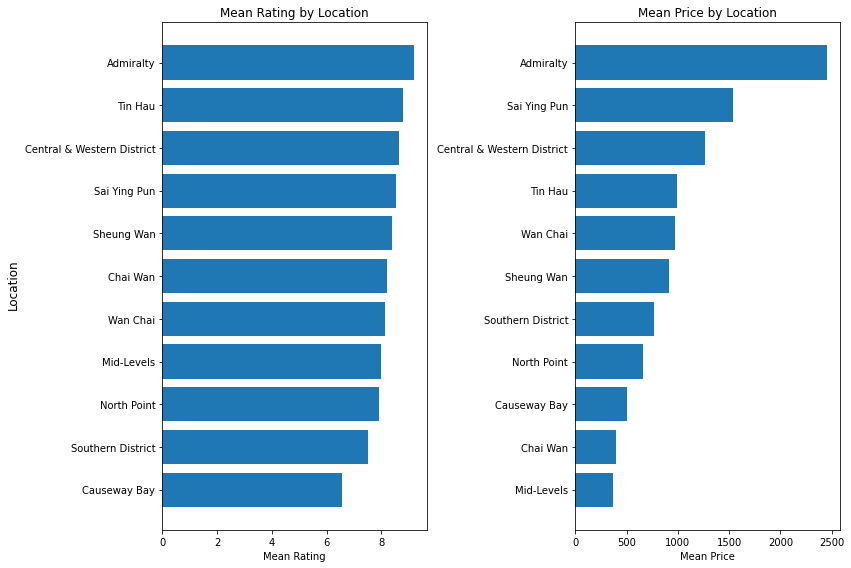

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,2,1)
ax1.barh(location_rating.index, location_rating.values)
ax1.set_xlabel('Mean Rating')
ax1.set_title('Mean Rating by Location')
ax2 = fig.add_subplot(1,2,2)
ax2.barh(location_price.index, location_price.values)
ax2.set_xlabel('Mean Price')
ax2.set_title('Mean Price by Location')
fig.supylabel('Location')
plt.tight_layout()

In [12]:
df.to_csv('hotels.csv', index=False)